<a href="https://colab.research.google.com/github/mvdj/mvdj.github.io/blob/master/ConsumoAlcoolAlunosMatematica_Regress%C3%A3oLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ConsumoAlcoolAlunosMatematica - Regressão Linear**

Dataset: https://www.kaggle.com/uciml/student-alcohol-consumption

Context:
The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. You can use it for some EDA or try to predict students final grade.

Content:
Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

* school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* sex - student's sex (binary: 'F' - female or 'M' - male)
* age - student's age (numeric: from 15 to 22)
* address - student's home address type (binary: 'U' - urban or 'R' - rural)
* famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* guardian - student's guardian (nominal: 'mother', 'father' or 'other')
* traveltime - home to school travel time (numeric: 1 - 1 hour)
* studytime - weekly study time (numeric: 1 - 10 hours)
* failures - number of past class failures (numeric: n if 1<=n<3, else 4)
* schoolsup - extra educational support (binary: yes or no)
* famsup - family educational support (binary: yes or no)
* paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* activities - extra-curricular activities (binary: yes or no)
* nursery - attended nursery school (binary: yes or no)
* higher - wants to take higher education (binary: yes or no)
* internet - Internet access at home (binary: yes or no)
* romantic - with a romantic relationship (binary: yes or no)
* famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* health - current health status (numeric: from 1 - very bad to 5 - very good)
* absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

* G1 - first period grade (numeric: from 0 to 20)
* G2 - second period grade (numeric: from 0 to 20)
* G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets .
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.


**Obs.: Para o presente trabalho foi utilizado apenas o student-mat.csv**


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **1. Importação das bibliotecas**


In [ ]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split


# **2. Lendo dados**


In [ ]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataSets/ConsumoAlcoolAlunosMatematica/consumo-alcool/student-mat.csv')

In [ ]:
# verificando o dataframe
dados.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


# **3. Convertendo atributos para tipo numérico**

In [ ]:
dados["school"].unique()

array(['GP', 'MS'], dtype=object)

In [ ]:
dados["sex"].unique()

array(['F', 'M'], dtype=object)

In [ ]:
dados["address"].unique()

array(['U', 'R'], dtype=object)

In [ ]:
dados["famsize"].unique()

array(['GT3', 'LE3'], dtype=object)

In [ ]:
dados["Pstatus"].unique()

array(['A', 'T'], dtype=object)

In [ ]:
dados["Mjob"].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [ ]:
dados["Fjob"].unique()

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

In [ ]:
dados["reason"].unique()

array(['course', 'other', 'home', 'reputation'], dtype=object)

In [ ]:
dados["guardian"].unique()

array(['mother', 'father', 'other'], dtype=object)

In [ ]:
dados["schoolsup"].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
dados["famsup"].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
dados["paid"].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
dados["activities"].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
dados["nursery"].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
dados["higher"].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
dados["internet"].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
dados["romantic"].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
#trocando o tipo de diversos atributos por um tipo numerico
dados['school'] = dados['school'].replace(['GP','MS'],[0,1])
dados['sex'] = dados['sex'].replace(['F','M'],[0,1])
dados['address'] = dados['address'].replace(['U','R'],[0,1])
dados['famsize'] = dados['famsize'].replace(['GT3','LE3'],[0,1])
dados['Pstatus'] = dados['Pstatus'].replace(['A','T'],[0,1])
dados['Mjob'] = dados['Mjob'].replace(['at_home', 'health', 'other', 'services', 'teacher'],[0,1,2,3,4])
dados['Fjob'] = dados['Fjob'].replace(['teacher', 'other', 'services', 'health', 'at_home'],[0,1,2,3,4])
dados['reason'] = dados['reason'].replace(['course', 'other', 'home', 'reputation'],[0,1,2,3])
dados['guardian'] = dados['guardian'].replace(['mother', 'father', 'other'],[0,1,2])
dados['schoolsup'] = dados['schoolsup'].replace(['no','yes'],[0,1])
dados['famsup'] = dados['famsup'].replace(['no','yes'],[0,1])
dados['paid'] = dados['paid'].replace(['no','yes'],[0,1])
dados['activities'] = dados['activities'].replace(['no','yes'],[0,1])
dados['nursery'] = dados['nursery'].replace(['no','yes'],[0,1])
dados['higher'] = dados['higher'].replace(['no','yes'],[0,1])
dados['internet'] = dados['internet'].replace(['no','yes'],[0,1])
dados['romantic'] = dados['romantic'].replace(['no','yes'],[0,1])
dados.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,0,0,4,4,0,0,0,0,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,0,1,1,1,0,1,0,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,1,1,1,1,0,1,1,0,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,0,0,1,4,2,1,2,2,0,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,0,0,1,3,3,2,1,2,1,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


In [ ]:
dados.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
#verificar a quantidade de instâncias
dados.shape

(395, 33)

# **4. Limpeza e organização dos dados**

In [ ]:
#verificar e eliminar se existem valores NAN, ? e/ou faltantes
dados = dados.dropna()

In [ ]:
#verificar quantidade de instâncias sem valores NAN, ? e/ou faltantes
dados.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,0,0,4,4,0,0,0,0,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,0,1,1,1,0,1,0,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,1,1,1,1,0,1,1,0,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,0,0,1,4,2,1,2,2,0,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,0,0,1,3,3,2,1,2,1,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


# **5. Análise preliminar dos dados**

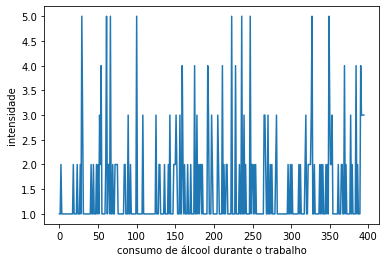

In [ ]:
#plotando tempo de estudo por internet
plt.plot(dados.Dalc)
plt.xlabel('consumo de álcool durante o trabalho')
plt.ylabel('intensidade')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


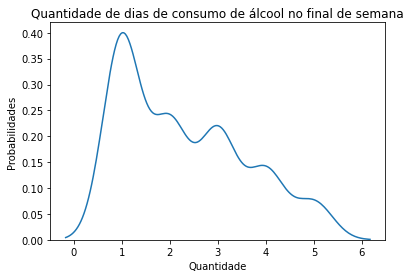

In [ ]:
# distribuição de probabilidade comparando job para as duas classes
sns.distplot(dados.Walc, hist=False, rug=False)
plt.xlabel('Quantidade')
plt.ylabel('Probabilidades')
plt.title('Quantidade de dias de consumo de álcool no final de semana')

plt.show()

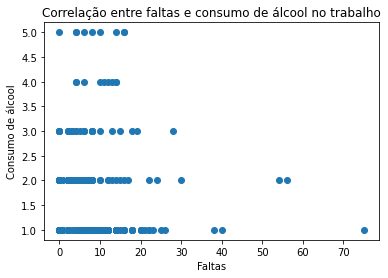

In [ ]:
# plotando correlação entre faltas e consumo de álcool no trabalho
plt.scatter(dados.absences,dados.Dalc)
plt.xlabel('Faltas')
plt.ylabel('Consumo de álcool')
plt.title('Correlação entre faltas e consumo de álcool no trabalho')
plt.show()

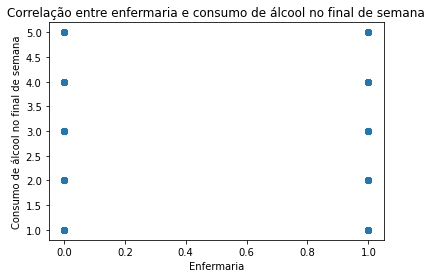

In [ ]:
# plotando correlação entre enfermaria e consumo de álcool no final de semana
plt.scatter(dados.nursery,dados.Walc)
plt.xlabel('Enfermaria')
plt.ylabel('Consumo de álcool no final de semana')
plt.title('Correlação entre enfermaria e consumo de álcool no final de semana')
plt.show()

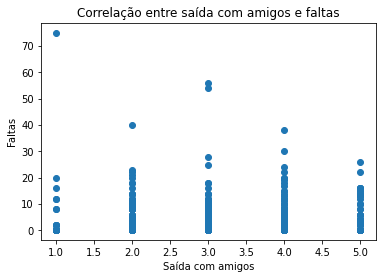

In [ ]:
# plotando correlação entre saída com amigos e faltas
plt.scatter(dados.goout,dados.absences)
plt.xlabel('Saída com amigos')
plt.ylabel('Faltas')
plt.title('Correlação entre saída com amigos e faltas')
plt.show()

In [ ]:
#calculando correlação dos dados com o atributo contagem
corr = dados.corr()

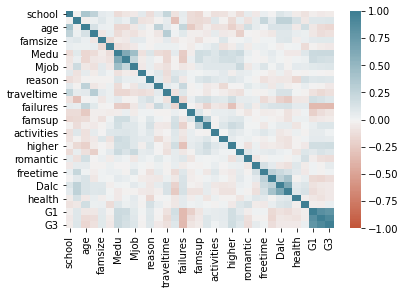

In [ ]:

#plotando coeficientes de correlação em um mapa de calor
sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

# **6. Re-escala dos dados**

**Re-escala usando máximo e mínimo**

In [ ]:
dados = (dados - dados.min())/(dados.max()-dados.min())

In [ ]:
dados.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,0.0,0.428571,0.0,0.0,0.0,1.00,1.00,0.00,0.00,0.000000,0.0,0.333333,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.75,0.50,0.75,0.00,0.00,0.5,0.080000,0.1250,0.315789,0.30
1,0.0,0.0,0.285714,0.0,0.0,1.0,0.25,0.25,0.00,0.25,0.000000,0.5,0.000000,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.00,0.50,0.50,0.00,0.00,0.5,0.053333,0.1250,0.263158,0.30
2,0.0,0.0,0.000000,0.0,1.0,1.0,0.25,0.25,0.00,0.25,0.333333,0.0,0.000000,0.333333,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.75,0.50,0.25,0.25,0.50,0.5,0.133333,0.2500,0.421053,0.50
3,0.0,0.0,0.000000,0.0,0.0,1.0,1.00,0.50,0.25,0.50,0.666667,0.0,0.000000,0.666667,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.50,0.25,0.25,0.00,0.00,1.0,0.026667,0.7500,0.736842,0.75
4,0.0,0.0,0.142857,0.0,0.0,1.0,0.75,0.75,0.50,0.25,0.666667,0.5,0.000000,0.333333,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.75,0.50,0.25,0.00,0.25,1.0,0.053333,0.1875,0.526316,0.50


# **7. Organizando dados para modelagem**

In [ ]:
#dividindo dados em atributos descritores e atributo de classe
X = dados.drop(columns=['Dalc'])
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Walc,health,absences,G1,G2,G3
0,0.0,0.0,0.428571,0.0,0.0,0.0,1.00,1.00,0.00,0.00,0.000000,0.0,0.333333,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.75,0.50,0.75,0.00,0.5,0.080000,0.1250,0.315789,0.30
1,0.0,0.0,0.285714,0.0,0.0,1.0,0.25,0.25,0.00,0.25,0.000000,0.5,0.000000,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.00,0.50,0.50,0.00,0.5,0.053333,0.1250,0.263158,0.30
2,0.0,0.0,0.000000,0.0,1.0,1.0,0.25,0.25,0.00,0.25,0.333333,0.0,0.000000,0.333333,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.75,0.50,0.25,0.50,0.5,0.133333,0.2500,0.421053,0.50
3,0.0,0.0,0.000000,0.0,0.0,1.0,1.00,0.50,0.25,0.50,0.666667,0.0,0.000000,0.666667,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.50,0.25,0.25,0.00,1.0,0.026667,0.7500,0.736842,0.75
4,0.0,0.0,0.142857,0.0,0.0,1.0,0.75,0.75,0.50,0.25,0.666667,0.5,0.000000,0.333333,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.75,0.50,0.25,0.25,1.0,0.053333,0.1875,0.526316,0.50


In [ ]:
y = dados.Dalc
y.head()

0    0.00
1    0.00
2    0.25
3    0.00
4    0.00
Name: Dalc, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2) #random_state=42

# **8. Treinando os modelos e fazendo previsão**

In [ ]:
#definindo modelo de regressão linear
linear = LinearRegression()
linear.fit(X_train,y_train)
pred_linear = linear.predict(X_test)

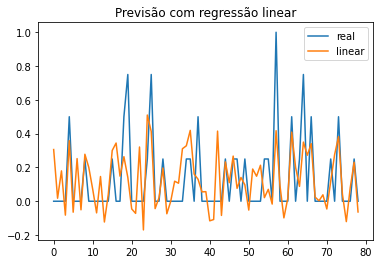

In [ ]:
#plotando resultados da MLP
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_linear,label='linear')
plt.legend()
plt.title('Previsão com regressão linear')
plt.show()

In [ ]:
#definindo modelo de árvore de decisão
arvore = DecisionTreeRegressor()
arvore.fit(X_train,y_train)
pred_arvore = arvore.predict(X_test)

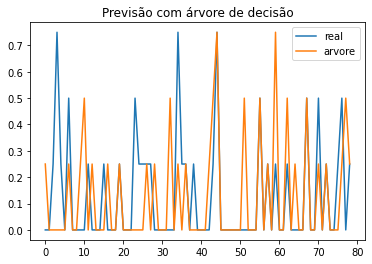

In [ ]:
#plotando resultados da árvore de decisão
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_arvore,label='arvore')
plt.legend()
plt.title('Previsão com árvore de decisão')
plt.show()

In [ ]:
#definindo modelo de random forest
floresta = RandomForestRegressor(n_estimators=100)
floresta.fit(X_train,y_train)
pred_floresta = floresta.predict(X_test)

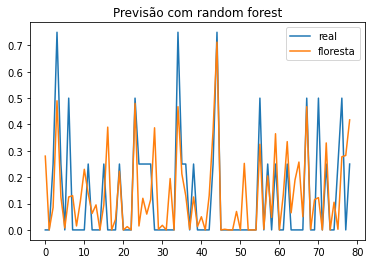

In [ ]:
#plotando resultados da random forest
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_floresta,label='floresta')
plt.legend()
plt.title('Previsão com random forest')
plt.show()

In [ ]:
#define modelo MLP
mlp = MLPRegressor(hidden_layer_sizes=(200,50),activation='logistic',max_iter=1000)
mlp.fit(X_train,y_train)
pred_mlp = mlp.predict(X_test)

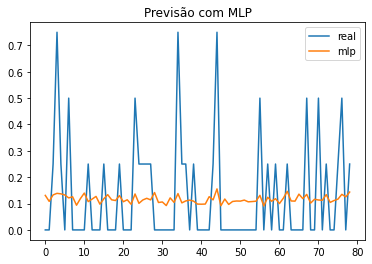

In [ ]:
#plotando resultados da MLP
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_mlp,label='mlp')
plt.legend()
plt.title('Previsão com MLP')
plt.show()

# **9. Avaliando modelos**

**Mean Absolute Error (MAE)**


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
#Mae Árvore
mean_absolute_error(y_test,pred_linear)

0.11332808771923715

In [ ]:
#Mae Árvore
mean_absolute_error(y_test,pred_arvore)

0.12341772151898735

In [ ]:
#Mae Random Forest
mean_absolute_error(y_test,pred_floresta)

0.10069620253164557

In [ ]:
#Mae MLP
mean_absolute_error(y_test,pred_mlp)

0.15455186245518204

**Mean Squared Error (MSE)**

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test,pred_linear)

0.024112498069710882

In [ ]:
mean_squared_error(y_test,pred_arvore)

0.04667721518987342

In [ ]:
mean_squared_error(y_test,pred_floresta)

0.021821677215189874

In [ ]:
mean_squared_error(y_test,pred_mlp)

0.036666925747413204

**Root Mean Squared Error (RMSE)**

In [ ]:
mean_squared_error(y_test,pred_linear)**(1/2)

0.15528199531726428

In [ ]:
mean_squared_error(y_test,pred_arvore)**(1/2)

0.21604910365440866

In [ ]:
mean_squared_error(y_test,pred_floresta)**(1/2)

0.14772162067615516

In [ ]:
mean_squared_error(y_test,pred_mlp)**(1/2)

0.19148609805260852

**Mean Absolute Percentage Error (MAPE)**

In [ ]:
def mean_absolute_percentage_error(y_test,y_pred):
  y_test=y_test.values
  erro = 0
  for i in range(len(y_test)):
    erro += abs(y_test[i]-y_pred[i])/y_test[i]
  return erro/len(y_test)

In [ ]:
mean_absolute_percentage_error(y_test,pred_linear)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


inf

In [ ]:
mean_absolute_percentage_error(y_test,pred_arvore)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


nan

In [ ]:
mean_absolute_percentage_error(y_test,pred_floresta)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


nan

In [ ]:
mean_absolute_percentage_error(y_test,pred_mlp)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


inf

**Comentários**

Inicialmente, observa-se que mesmo fazendo a conversão dos tipos de vários atributos do dataset (**(tópico 3)** de categóricos para numéricos) isto não representou, principalmente por não encontrar correlação nos atributos, um bom dataset no geral, talvez podendo ser alterado com outras técnicas no pré-processamento.

Observa-se porém que no treino e previsão **(tópico 8)**, pelo menos visualmente, o gráfico da regressão linear o foi mais próximo do random forest no tocante a previsão. 

Por fim, quanto as métricas de avaliação do modelo observa-se que não foram com boa performance, sendo por exemplo a **Mean Absolute Percentage Error (MAPE)** não processada por conta de resultar em uma divisão por zero.

